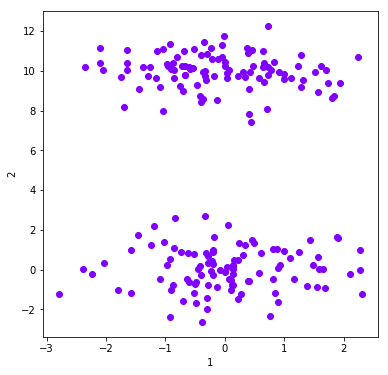

In [1]:
#Reproduce Ana Fred's Majority voting solution to stabilizing KMeans clustering using OpenEnsembles
#import numpy as np 
import pandas as pd 
#import random
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe


#Set up a dataobject of samples from two Guassians 
n_samples = 200
#centers = [(0,0), (3, 6.32)] #Change distance between centers to make the problem easier/harder
centers = [(0,0), (0, 10)]
x, y = datasets.make_blobs(n_samples=n_samples,centers= centers,cluster_std=1)

df = pd.DataFrame(x) #put the dataset into a dataframe

dataObj = oe.data(df, [1,2]) #instantiate the dataset, which is called 'parent'
dataObj.plot_data('parent') # Plot


## Example of calculating and plotting a single clustering solution

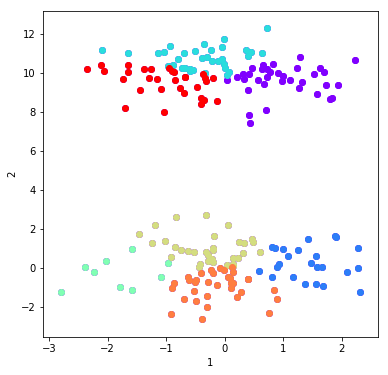

In [2]:
#Plot a single solution 
# default Scikit-learn settings, which have built in some determinism, we will override that

c = oe.cluster(dataObj) 
K = 7 
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1) #This solution will be called 'kmeans'
dataObj.plot_data('parent', class_labels=c.labels['kmeans']) #plot the data according to solution 'kmeans'


## Plot convergence towards solution

In [3]:
# Build an ensemble of Kmeans solutions and use Majority Voting as a finishing technique. One can see that, 
# generally (depending on the particular solution), 
c = oe.cluster(dataObj) 
K = 14  # number of clusters to create
numIterations = 25
c_MV_arr = []
fig_arr = []
modulo = 2
for i in range(1,numIterations):
    name = 'kmeans_' + str(i) #to append a new solution, it must have a name (dictionary key) that is unique
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1) #c.cluster will eventually become numIterations long
    
    # here we are going to create a finished solution from clustering solutions 0..i, and do this every modulo solutions      
    if not i % modulo:
        c_MV_arr.append(c.finish_majority_vote(threshold=0.5)) 


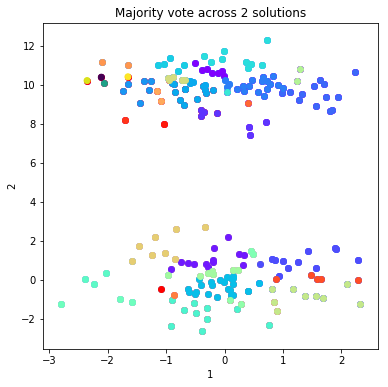

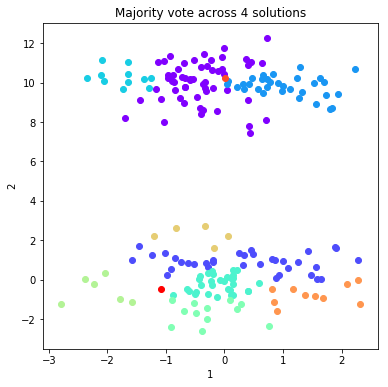

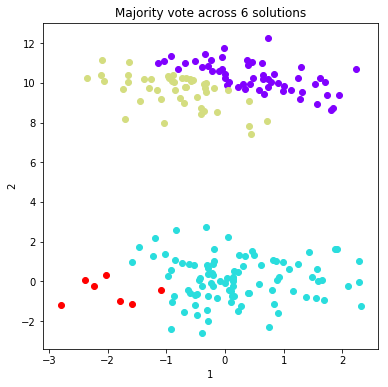

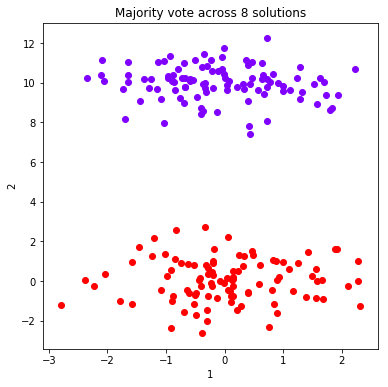

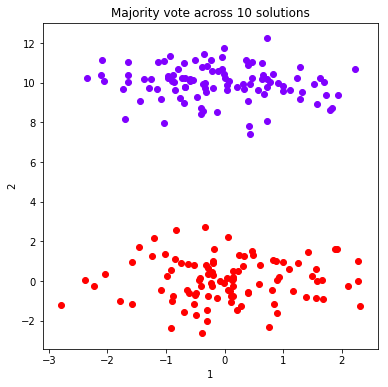

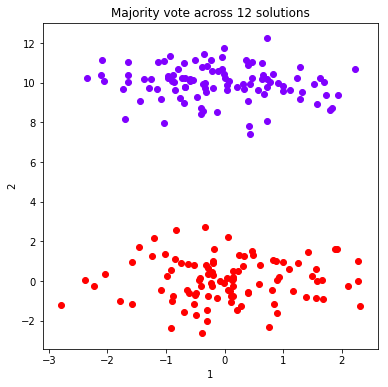

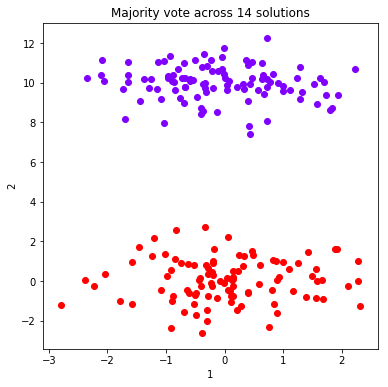

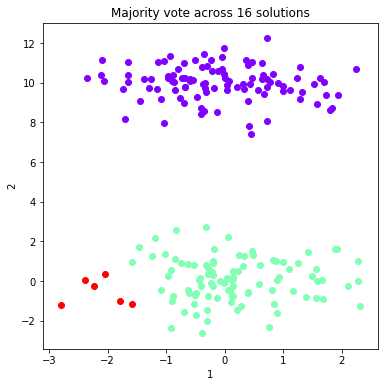

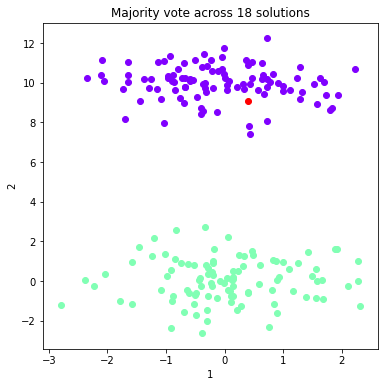

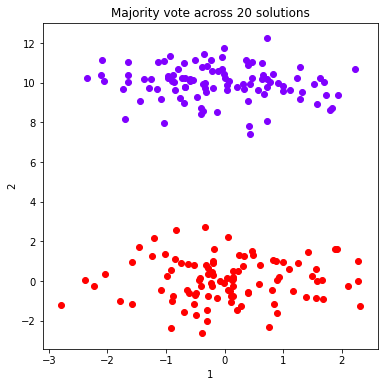

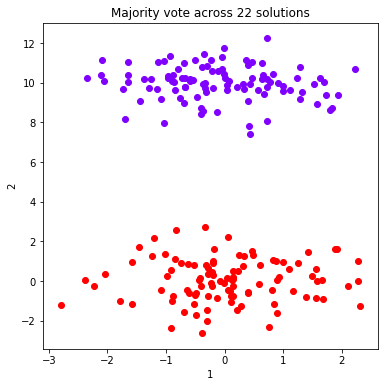

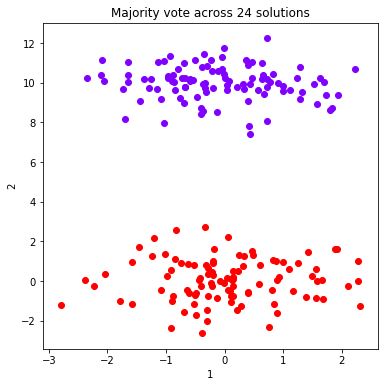

In [4]:
for ind in range(0, len(c_MV_arr)):

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    plt.title('Majority vote across %d solutions'%(modulo+modulo*ind))
    plt.show()


## Plot the co-occurrence matrix of the ensemble

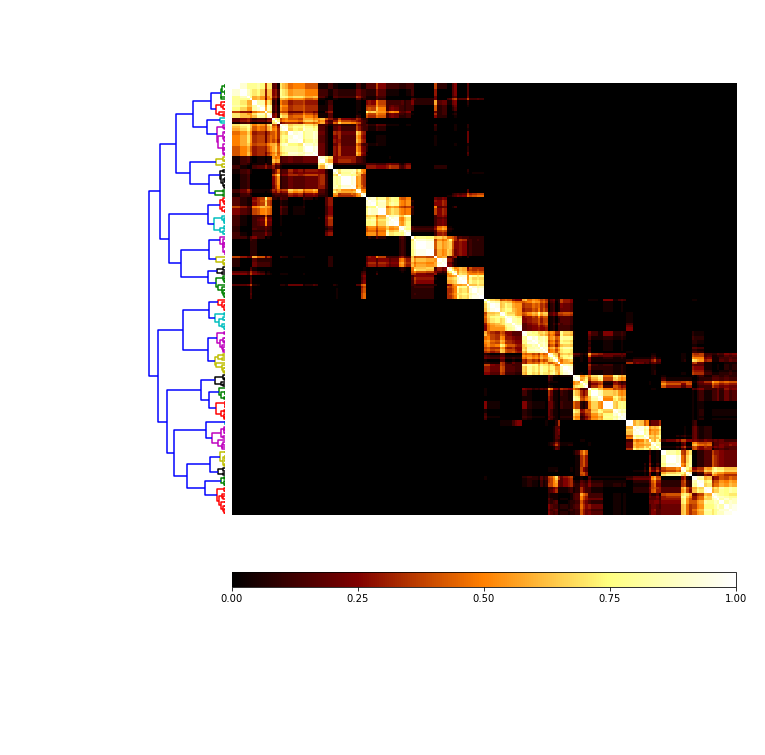

In [10]:
coMat = c.co_occurrence_matrix()
coMat.plot(linkage='ward', labels=False)
